# Artificial Neural Network (ANN)

- Turkcesi yapay sinir aglaridir. 
- ANN bir deep learning'dir, deep learning'i olusturan algoritmalardan bir tanesi ANN'dir. 
- <strong>Neural Network Nedir?</strong>
- Basit bir sekilde logistic regresyonu en az 2(n) kez tekrar etmektir.
- Logistic regressionda input ve output layer vardir burada en azından bir tane hidden layer olmak zorunda.
- Derinlik kavramini olusturan sey <strong>hidden layer</strong> sayisidir. 
- <strong> Neden hidden diyoruz?</strong>
- Hidden layer'lar inputlari gormezler. 
- Ornegin bir tane input(resim), bir tane hidden layer, bir tane de output var bu sebeple 3 tane saydik. Ama kaç layer kullandigimizi biri sordugunda 2 tane dememiz gerekiyor. Cunku sektorde input layer sayilmiyor. 

-  2 layera sahip neural network:

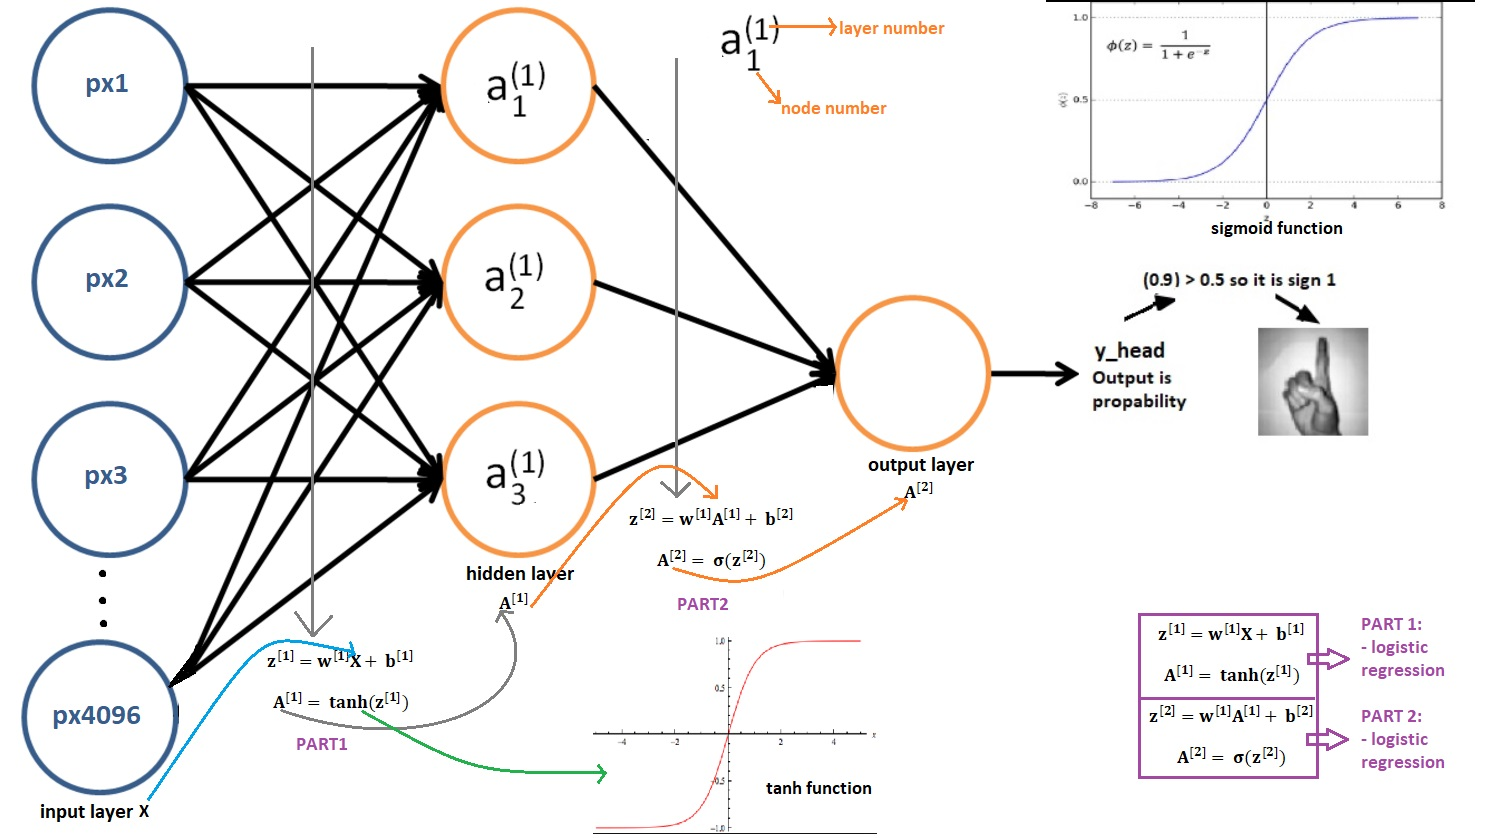

In [1]:
from IPython.display import Image
Image(filename='ft.jpeg') 

- Yukaridaki resimde input ve output layer'ın arasinda bir hidden layer var.
- Hidden layer'ın uzerindeki seyler (3 tane)<strong> node</strong> olarak adlandirilir. Yani input layer'da 4096 tane, output layerda ise bir tane node mevcut. 
- Hidden layer'da uc adet node olmasinin sebebi yok sadece oyle secilmis. Node sayisi tipki learning_rate gibi hyperparameter'dır. En uygununu deneyerek bulmamiz gerekiyor.
- Input ve output layerlarda bir degisiklik yok. Logistic Regression ile ayni. 
- Burada da fotograftaki pikseller weight ile carpilir bias ile toplanir bir z degeri elde edilir. Logistic regression'da biz z degerini sigmoid fonksiyona sokuyorduk. ANN'de ise <strong>tanh function</strong>'a sokulur. Bu fonksiyon tipki sigmoid gibi bir aktivasyon fonksiyonu olarak gecer. Sigmoid'den tek farki sigmoid icine aldigi degeri sifir ve bir arasina sikistirir output 0 ile 1 arasindadir. Tanh function ise <strong>1 ile -1</strong> arasina sikistirir. Tanh, sigmoidden daha iyidir cunku tanh fonksiyonunun ortalamasi 0'a daha yakin. Bu datayi merkezde tutuyor. Daha oncede ortalamayi sifira daha yakin tutmamiz gerektigini soylemistik.
- 1) input(x)'u weight(w1) ile carpiyoruz ve bias(b1) ile topluyoruz bir z1 degeri elde ediyoruz bunu tanh fonksiyonuna soktuktan sonra bir <strong>A1</strong> degeri elde ediyorum. Buradaki a degerleri hidden layer'daki a degeri olmus oluyor.
- 2) daha sonra tekrar weightlerle(w2) a(A1) degerlerimizi carpiyoruz ve bias(b2)'i ekliyoruz ve z2 degeri elde ediyoruz. Bu z2 degerini sigmoid fonksiyonunun icine sokup A2 (sigmoid'deki y_head) degerini elde ediyorum. 
----
- hidden layer icindeki nodeların anlamı su sekildedir:
- a'nın üzerindeki sayi layer number yani hangi hidden layerda oldugumu gosteriyor. 
- a'nin altindaki ise node number yani node'larım.
-----
- aktivasyon fonksiyonlarinin kullanilmasinin nedeni non linearity'i azaltmaktir. Yani ne kadar karmasik seyler ogrenirsem datayi o kadar iyi ogrenirim anlamina gelmektedir. 
----
- Yukaridaki resimde mor kisimlara bakacak olursak iki tane logistic regression var part1 ve part2 olarak. İlk islem hidden layera kadar olan islemdir. 
     - logistic'de input=>output
     - 2 layer neural network'de: input=>hidden layer => output. 

### Data Set

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
x_l = np.load("data/X.npy")
y_l= np.load("data/Y.npy")

In [4]:
x = np.concatenate((x_l[204:409],x_l[822:1027]), axis=0) #0 ve 1'ler
z = np.zeros(205) #label 0
o = np.ones(205) #label 1
y = np.concatenate((z,o),axis=0).reshape(x.shape[0],1)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=42)
# data %75'i train %15'i test olarak ayrildi
#her calistirdigimizda ayni randomlikta datayi bolmesi icin random_state kullanildi
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [6]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test.reshape(number_of_test,x_test.shape[1]*x_test.shape[2])


In [7]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_train = y_train.T
y_test = y_test.T

In [8]:
def sigmoid(z):
    y_head = 1/ (1+np.exp(-z))
    return y_head

## 2-Layer Neural Network

### Initializing Parameters

- Guncellememiz gereken w1, w2, b1, b2 degerleri var.
- Logistic reg.'da weight icin 0.01 ve bias icin 0 degerleri secmistik.
- Bu sefer random sekilde initializing yapacagiz.
- Weight baslangicta 0 olarak tanımlanirsa belirli bir iterationdan sonra gradient descent artik farklilik yaratmamaya baslayacak, hep ayni seyi hesaplamaya baslayacak, hep ayni seyi hesaplayacak ve cesitlilik elde edemeyecegiz. Weightleri random olarak tanimlayip cesitlilik olmasini saglayacagiz. Random olmasina ragmen kucuk degerler olacak, cunku diger turlu tanh fonksiyonundan dolayi guncelleme surem cok uzun surecek.

In [9]:
def initialize_parameters_and_layer_sizes_NN(x_train,y_train):
    parameters = {
                  "weight1":np.random.randn(3,x_train.shape[0]) *0.1,
                  "bias1":np.zeros((3,1)),
                  "weight2":np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2":np.zeros((y_train.shape[0],1))
                 }
    return parameters

- ` " weight1":np.random.randn(3,x_train.shape[0]) *0.1, ` sayiyi kucultup random olarak sayilar uretiyor. 
` (3,x_train.shape[0])` bu kisim ise 3,4096. Sebebine gelecek olursak 3 tane node'a sahip oldugum icin. 
- ` "bias1":np.zeros((3,1))` x'i weight ile carptiktan sonra bias ile toplarken sizelarin ayni olmasi gerekiyor bu yuzden 3,1 yaptik.
- `"weight2":np.random.randn(y_train.shape[0]) * 0.1` 0.1 kucuk bir sayi elde edebilmek icin kullanilir. `y_train.shape[0]` sonucu 1'dir. Yani weight2 1,3 olacak. Bunun nedeni 1,3 ile 3,1 'i carpinca 1 elde ederim ve benim buradan bir tane node output node'um oldugu anlamina gelir. 
- `"bias2":np.zeros(y_train.shape[0],1)` burada bias'ında 1,1 olmasini beklerim cunku 1,3'luk weight ile 3,1'lik bir layer'ı carptigimda 1,1 yani bir tane sabit elde ediyorum bununla da bias'i (1x1) topladigimda normal bir sayi elde etmis olurum.  

In [10]:
def forward_propagation_NN(x_train, parameters): 

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

- LR'da sigmoid fonk.'u kendimiz yazmistik ama burada `np.tanh()` kullanacagiz.
- forward propagation parametre olarak `x_train` ve `parameters` aliyor. Parametrelerim weightler ve biaslar.
- ` Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"] ` islemi z1 degerini hesaplamizi sagliyor. `np.dot` ile weight1 degeri ve x_trainlerimizi carpiyoruz daha sonra bias1 ile toplayarak z1 degerini elde ediyoruz.
-  A1'i bulmak icin ` A1 = np.tanh(Z1)` tanh fonksiyonuna z1'i sokuyoruz.
- Simdi A1'i elde ettigimize gore artik hidden layer ile islem yapacagiz.
- Z2 degeri icin  `  np.dot(parameters["weight2"],A1) + parameters["bias2"] `  islemleri gerceklestirilerek A1 degerimiz ile weight2 degerini carparak, bias2 ile topluyoruz. 
- Son islem olarak sigmod'e Z2 degerini sokuyoruz. 
- Bunun sonucunda olasiliksal bir A2 degeri elde ediyoruz. 

### Loss function and Cost function

In [11]:
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

- Cost function parametere olarak  ` A2 `  aliyor cunku benim outputum bu deger.  ` Y ` ve  ` parameters `(w ve b) input olarak aliyor. 
-  ` np.multiply(np.log(A2),Y) ` A2'nin logaritmasini aliyorum ve A2 yani outputdaki gercek degerler ile  Y degerleri carpiyorum
-  ` -np.sum(logprobs)/Y.shape[1] ` cost function benim tum losslarimin toplami oldugu icin logprobs'lari toplayip y'i kullarak sample sayisina boluyorum ve cost'u return ediyorum.

### Backward Propogation

In [12]:
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1] #costun w1'e gore turevi 
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

- fonksiyonumuzun parametleri su sekildedir:
- `parameters` icinde w1,w2,b1,b2 var.
- `cache` icinde a1,a2,z1,z2 var.
- `x` icinde fotograflar var.
- `y` icinde ise labellar mevcut.
---
- cost fonksiyonundan w1'e gidebilmek icin cost'un z2'e gore turevi, z2'ninde w1'e gore turevini almamiz gerekir. Bias icinde aynisi gecerli. 
- ` keepdims=True`  array olarak tutar yani sum isleminin sonucu bir constant sayi bile olsa bunu arrayin icine yaziyor. 
- ` grads` 'ın icinde degisimlerimi tutuyorum ve bunlari sonra dondurerek update methodunda kullanacagiz. 
- Layer kismi arttikca yazdigimiz fonksiyonun karmasikligi da artacaktir. 

In [13]:
 def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

- backward propagationda paremetrelerimizin degisimlerini bulduk artık bunlari update edecegiz. 
- LR'deki gibi update islemi olacak.
- yazdigimiz fonksiyonda sirayla paremetreleri, degisimleri, ve deneyerek bulunmasi gereken hyperparameter olan ogrenme oranimi parametre olarak aliyorum. 
- onceki weight - learning_rate * cost'umun weight'e gore degisimi formulu kullanilarak update islemleri gerceklestirilir. 

### Prediction 

In [14]:
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

- oncelikle forward propagation fonksiyonu ile y_head degerini elde edecegim bu fonksiyon bana `A2` ve `cache` olarak iki farkli variable donduruyor. A2 zaten y_head degerim oluyordu. 
- daha sonra `Y_prediction` diye numpy array olusturuyorum.
- A2 degerime bakiyorum 0.5den buyuk ise `1` degilse `0`dir diyorum ve bu bilgileri y_prediction adli degiskende depoluyorum. Daha sonra hazirladigimiz bu arrayi return ediyoruz.

### Create Model
- yaptigimiz seyleri birlestirerek bir method olusturacagiz. 

Cost after iteration 0: 0.411206
Cost after iteration 100: 0.369490
Cost after iteration 200: 0.353742
Cost after iteration 300: 0.347907
Cost after iteration 400: 0.345738
Cost after iteration 500: 0.344901
Cost after iteration 600: 0.344508
Cost after iteration 700: 0.344102
Cost after iteration 800: 0.345934
Cost after iteration 900: 0.337776
Cost after iteration 1000: 0.314932
Cost after iteration 1100: 0.281367
Cost after iteration 1200: 0.244303
Cost after iteration 1300: 0.210757
Cost after iteration 1400: 0.181489
Cost after iteration 1500: 0.155907
Cost after iteration 1600: 0.143152
Cost after iteration 1700: 0.121042
Cost after iteration 1800: 0.107372
Cost after iteration 1900: 0.096242
Cost after iteration 2000: 0.087122
Cost after iteration 2100: 0.079462
Cost after iteration 2200: 0.072862
Cost after iteration 2300: 0.067119
Cost after iteration 2400: 0.062045


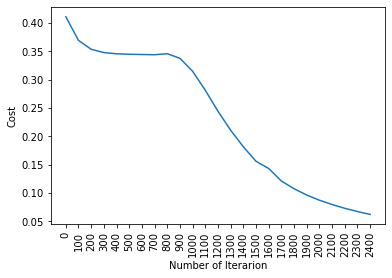

train accuracy: 99.42528735632185 %
test accuracy: 95.16129032258064 %


In [15]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)
     # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

- oncelikle `initialize_parameters_and_layer_sizes_NN(x_train, y_train)` ile layerimda kac tane node olacagini belirledik. Bunun icinde node sayimin 3 oldugu belliydi o yuzden parametre olarak extra node sayisi diye bir sey yok. Yazdigimiz bu fonksiyonla amacimiz parametreleri initialize etmekti. w,b'in boyutlarini belirmem icin input olarak x_train ve y_train aliyorum ki boyutlari buradan cekebileyim. Sonra paremetrelerimi initialize etmis oluyorum. Artik elimde random bir sekilde initialize edilmis 0.01 civarinda bulunan sayilar(weight ve bias) mevcut. 

- Simdi forward propagation yapilacak ve bunun icin bir for dongusu olusturuluyor ve yazdigimiz `forward_propagation` adli fonksiyon cagiriliyor. Ve bu fonksiyon bana A2 ve cache donduruyor. 

- Cost hesaplama islemi icin yazdigimiz `compuate_cost_NN` fonksiyonunu cagriyoruz. Paremetre olarak A2(y_head), y_train(y_train'e gore cost'u buluyoruz ve parametrelerimizi cost'a gore guncelliyoruz) ve parameters aliyor sonucunda bize cost'u donduruyor.

- Artık `backward_propagation_NN` fonksiyonu ile cost'un weight ve bias'a gore olan degisimlerini bulmam lazim. Bu da bana turevleri donduruyor. 

- Son olarak `update_parameters_NN` cagrilarak parametreleri update ediyoruz. 

- Her yuz adimda bir cost_list'e append ile cost'u index_list'e ise for donugusundeki degeri depolayacagim. Ve bunlari print ettiriyorum.

- Ve cost'un degisimini bir grafikle gosteriyorum. 

- Daha sonra prediction islemi yapilip, accuracy'leri yazidiriyorum.
 

## L-Layer Neural Network

- **Hidden layer sayisini arttirirsam ne olur?**
- Hidden layer'lar resmin basit bilesenlerini kesfederler.
- Asagidaki gibi hidden layer 1 iken simple sekilleri kesfeder, duz cizgileri, kenarlari. Fakat hidden layer sayisini 2 yaptigimizda daha cok kenar kesfeder.
- Yani hidden sayim, derinligim arttikca kesfettigim karmasiklik artar. 
- Bu islemle non linearity'i arttirmis olurum. 
- Bu sayede datam daha iyi train edilmis olur. 

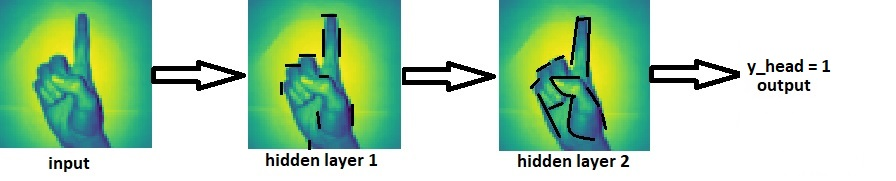

In [16]:
Image(filename='ft2.jpeg') 

- Hidden sayisi arttikca daha komplex sekilleri gorurum daire, cember, bir parmagin ucu gibi.. 
- `number of hidden layer` hidden layerlarin sayisi ve  ` number of hidden units ` hidden layerdaki nodelarin sayisi bunlarin secilmesi gereken hyper parameterlardir. 
- Bu ornekte activation function olarak `relu` kullanilacak.
- 2 hidden layer, bu hidden layerlar icin 8 ve 4 adet node kullanilacaktir.
- en sondaki output icin sigmoid kullanilacak binary classification icin.
- number of iteration sayisi ise 100 olacak.
- ve keras kullanilacak

In [17]:
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

- keras kullanirken tranpose almamiz isimizi kolaylastiriyor.

### Implementing with Keras library

In [18]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

2023-01-04 22:36:52.768582: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-04 22:36:57.944810: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
8/8 [==============================] - 1s 6ms/step - loss: 0.6934 - accuracy: 0.4784
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6930 - accuracy: 0.5431
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6929 - accuracy: 0.5431
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6928 - accuracy: 0.5431
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6925 - accuracy: 0.5431
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6923 - accuracy: 0.5431
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6919 - accuracy: 0.5431
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.5431
Epoch 9/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6899 - accuracy: 0.6164
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6872 - accuracy: 0.8233
Epoch 11/100
8/8 [===========

8/8 [==============================] - 0s 6ms/step - loss: 0.1759 - accuracy: 0.9698
Epoch 85/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1750 - accuracy: 0.9741
Epoch 86/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1880 - accuracy: 0.9612
Epoch 87/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1886 - accuracy: 0.9440
Epoch 88/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1874 - accuracy: 0.9612
Epoch 89/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1900 - accuracy: 0.9612
Epoch 90/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1665 - accuracy: 0.9828
Epoch 91/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1624 - accuracy: 0.9741
Epoch 92/100
8/8 [==============================] - 0s 8ms/step - loss: 0.1521 - accuracy: 0.9784
Epoch 93/100
8/8 [==============================] - 0s 9ms/step - loss: 0.1509 - accuracy: 0.9741
Epoch 94/100
8/8 [===============

8/8 [==============================] - 0s 6ms/step - loss: 0.6923 - accuracy: 0.5216
Epoch 67/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6923 - accuracy: 0.5216
Epoch 68/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6923 - accuracy: 0.5216
Epoch 69/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6923 - accuracy: 0.5216
Epoch 70/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6923 - accuracy: 0.5216
Epoch 71/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6923 - accuracy: 0.5216
Epoch 72/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6923 - accuracy: 0.5216
Epoch 73/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6923 - accuracy: 0.5216
Epoch 74/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6923 - accuracy: 0.5216
Epoch 75/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6923 - accuracy: 0.5216
Epoch 76/100
8/8 [===============

8/8 [==============================] - 0s 7ms/step - loss: 0.3112 - accuracy: 0.9784
Epoch 49/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3193 - accuracy: 0.9569
Epoch 50/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3064 - accuracy: 0.9784
Epoch 51/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3075 - accuracy: 0.9784
Epoch 52/100
8/8 [==============================] - 0s 5ms/step - loss: 0.3394 - accuracy: 0.9569
Epoch 53/100
8/8 [==============================] - 0s 5ms/step - loss: 0.3146 - accuracy: 0.9181
Epoch 54/100
8/8 [==============================] - 0s 7ms/step - loss: 0.3186 - accuracy: 0.9440
Epoch 55/100
8/8 [==============================] - 0s 9ms/step - loss: 0.2946 - accuracy: 0.9741
Epoch 56/100
8/8 [==============================] - 0s 7ms/step - loss: 0.2904 - accuracy: 0.9784
Epoch 57/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2876 - accuracy: 0.9741
Epoch 58/100
8/8 [===============

- **units** layerın outputundaki dimension'u belirtir.
- **kernal_initializer** weightleri initialize etmeye yarayan parametre. 
- **activation** relu kullanacagiz. 
- **input_dim** keras kullaniyorsak belirtmek zorundayiz x_train'in shape'ini.
- **epochs**: iteration sayisi.

` from keras.wrappers.scikit_learn import KerasClassifier ` Keras'ta bir seyi classifier ederken bunu import etmemiz gerekir.
- `from keras.models import Sequential` weight ve bias'ı initialize etmek icin kullanacagiz. 
- `from keras.layers import Dense` layerlari build etmek icin kullaniriz.
- `build_classifier()` adinda bir method yazacagiz bu neural networku olusturacak yapi olacak:
    - ` Sequential()` methodunu cagirarak bir neural network yapisi initialize ettim ve bu yapiya `classifier` adini verdim.
    - `classifier.add` yazdiktan sonra `Dense` yani layerlarimizi insa etmemizi saglayan yapiydi. `units`'i 8 sectik.(hidden layer'dan 8 adet olacak)
    - `kernal_initializer` uniform sectik boylelikle yine random bi sekilde dagilacak.
    - `activation` relu sectik
    - `input_dim` bunu yazmak zorundayiz, x_train'in shape'ini alir yani 4096.
- yine claffier.add diyoruz bu layer ekleyecegimizin anlamina gelir. ve Dense ile de layer eklemek istedigimizi belirtiyoruz. bu sefer 4 tane node'dan olusan bir layer ekliyoruz. kernel_itializer yine uniform activation function yine relu olacak.
- yine bir layer ekliyorum bu sefer bir adet node'dan olusacak initializer uniform activation function ise sigmoid olacak yani son output layerimi bu adimda eklemis oldum. 
- artik classifier'ı compile etmem icin gerekli optimizasyon parametrelerini tanimlayabiliriz:
    - loss'u bulmak icin `loss` parametresine 'binary_crossentropy' yazdik. Bu benim LR'da kullandigim loss function'un aynisi. 
    - `optimizer = 'adams'` adam optimizer kullanacagiz. Gradient descent kullanarak biz learning rate'i sabit tutuyorduk. Adam da learning rate sabit olmuyor ve daha hizli ogrenmemize sebep oluyor. Memoryimizi daha iyi kullanmamizi sagliyor. 
    - degerlendirme metrigi icin accuracy'i sectik.
- en sonunda classifer'ı retun ettik.
-----

- Suan iki tane biri 8 digeri 4 olmak uzere hidden layer ekledik.Bir tane de output layer ekledik.
- Simdi yapmamiz gereken sey classifier'ımızı cagirmak. Bir classifier build edildi, bunu cagirip kullanacagiz. 
- Bunu kullanirken `KerasClassifier` diye bir method kullanacagiz build edilen fonksiyonu cagiracagiz. 
    - `build_fn ` diye bir parametre var bunu build ettigimiz fonksiyona esitliyoruz. 
    -  `epoch` ile iteration sayimizi 100 yapiyoruz. 
    - yaptiklarimizi classifier adinda bir degiskene atiyoruz.
- Bu islemlerden sonra geriye bir tek egitmek kaliyor. Egitim icim cross validation kullanacagiz.  
    - `estimator` benim kullanacagim classifierım 
    -  `x ` ve  ` y` parametrelerim ise x_train ve y_train
    -  ` cv` ise 3 yani 3 kez accuracy bul ben bunlarin ortalamasini alayim ki daha dogru bir sonuc elde etmis olalim.
    - daha sonra bu yaptigimizi accuracies diye bir degiskene atip, mean diye degiskene ise accuracylerin ortalamasini hesaplatip icine atiyoruz. Daha sonra varyansını alip print ettiriyoruz. 

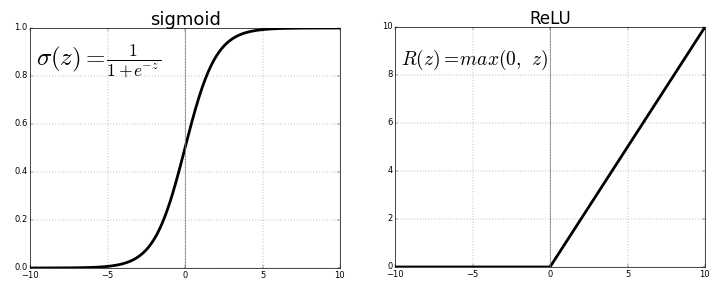

In [19]:
Image(filename='ft3.png') 

- ReLU'da input 0'dan kucuk ise 0 olarak degerlendirilir.

- ReLU'ya -5, -6 girdiğinde 0 olarak cikar.

- Input 0'dan buyukse, input neyse output da o olur.

- ReLU'ya 5 girmisse 5 olarak cikar.

- **batch size:*** forward ve bacward propagation yapacagim sample sayisi demek. 100 tane sample icin batch size'ım 100 ise bir kez forward ve bacward propagation yapilacak ve 1 epoch'a esit olacak demek oluyor.
- eger batch size 10 ise 10 kere backward ve forward propagation yapacagim ve 1 epoch elde etmis olacagim. 